In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


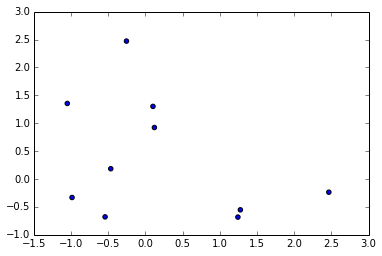

In [12]:
n = 10
x = randn(2*n).reshape(n,2)
scatter(x[:,0], x[:,1]);

In [43]:
class Cluster(object):
    def __init__(self, nodes, weights, degrees, perimeter = None, area = None):
        self.nodes = nodes.astype(float)
        self.weights = weights.astype(float)
        self.degrees = degrees #this never changes       
        if(perimeter == None):
            self.perimeter = sum(self.weights)
        else:
            self.perimeter = perimeter
        if(area == None):
            self.area = 0
        else:
            self.area = area
        self.parent = None
        self.parentId = None
            
    def get_closest(self):
        if(sum(self.nodes) == len(self.nodes)):
            raise IndexError
        if(sum(self.weights) == 0):
            raise IndexError
        if (self.parent == None):
            temp_perimeter = self.perimeter - 2*self.weights + self.degrees
            temp_area = self.area + self.weights 
            ratios = temp_area / (temp_perimeter + 0.000001)
            next_vertex = np.argmax(ratios * np.logical_not(self.nodes))
            this_alpha = (self.area*temp_perimeter[next_vertex])/(self.perimeter*temp_area[next_vertex]) 
            return (next_vertex, temp_area[next_vertex], temp_perimeter[next_vertex], this_alpha)
        else:
            return self.parent.get_closest()
        
    def get_alpha(self, other_node):
        if(sum(self.nodes) == len(self.nodes)):
            raise IndexError
        if(sum(self.weights) == 0):
            raise IndexError
        if (self.parent == None):
            temp_perimeter = self.perimeter - 2*self.weights[other_node] + self.degrees[other_node]
            temp_area = self.area + self.weights[other_node] 
            this_alpha = (self.area*temp_perimeter)/(self.perimeter*temp_area) 
            return this_alpha
        else:
            return self.parent.get_alpha(other_node)
        
        
    def add_nodes(self, node_vector, weight):        
        self.perimeter = self.perimeter - 2*sum(self.weights*node_vector) + sum(self.degrees*node_vector)
        self.area = self.area + sum(self.weights*node_vector)
        self.weights = self.weights + weight.astype(float) 
        self.nodes = self.nodes + node_vector
        
        

In [27]:
n = 40
x = randn(2*n).reshape(n,2)
def gauss_sim(x,y, sigma = 1):
    d = (x[0]-y[0])**2 + (x[1] - y[1])**2
    return np.exp(-d/(2*sigma))
adjacency = [[0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(i+1,n):
        g_s = gauss_sim(x[i],x[j])
        adjacency[i][j] = g_s
        adjacency[j][i] = g_s

In [45]:
graph = np.array(adjacency)
degrees = np.sum(graph, axis = 1) 
n = len(graph)
all_nodes = np.eye(n)
clusters = [Cluster(all_nodes[i],graph[i].astype(float),degrees) for i in range(n)]
clustered = [0 for i in range(n)]

where_we_are = [0]
for i in range(35):
    here = where_we_are[-1]
    if(sum(clusters[here].nodes)==n):
        print("breaking")
        break
    print("here",here)
    
    next_node, not_using, not_using2, alpha = clusters[here].get_closest()
    print("next_node", next_node, "alpha", alpha)
    while(clusters[next_node].parent):
        next_node = clusters[next_node].parentId
        print("Parent ID:", next_node )
    
    next_node_best, not_using, not_using2, not_using3 = clusters[next_node].get_closest()
    print("next_node_best", next_node_best)
    other_alpha = clusters[next_node].get_alpha(here)
    print("alpha to last node", other_alpha)
    if(clusters[here].nodes[next_node_best] == 1):
        print("match!", next_node)
        clusters[here].add_nodes(clusters[next_node].nodes,clusters[next_node].weights)

        clusters[next_node].parent = clusters[here]
        clusters[next_node].parentId = here

    else:
        print("havnt gotten here yet")
        where_we_are.append(next_node)
            
#for i in range(n):
#    print(clusters[i].nodes)           
         

here 0
next_node 14 alpha 0.0
next_node_best 0
alpha to last node 0.0
match! 14
here 0
next_node 27 alpha 0.479484900617
next_node_best 14
alpha to last node 0.0
match! 27
here 0
next_node 10 alpha 0.726475439671
next_node_best 14
alpha to last node 0.0
match! 10
here 0
next_node 39 alpha 0.827818191357
next_node_best 23
alpha to last node 0.0
havnt gotten here yet
here 39
next_node 23 alpha 0.0
next_node_best 39
alpha to last node 0.0
match! 23
here 39
next_node 0 alpha 0.493808165267
next_node_best 39
alpha to last node 0.827818191357
match! 0
here 39
next_node 3 alpha 0.758209230302
next_node_best 23
alpha to last node 0.0
match! 3
here 39
next_node 34 alpha 0.815233322966
next_node_best 38
alpha to last node 0.0
havnt gotten here yet
here 34
next_node 38 alpha 0.0
next_node_best 34
alpha to last node 0.0
match! 38
here 34
next_node 36 alpha 0.491767773228
next_node_best 38
alpha to last node 0.0
match! 36
here 34
next_node 25 alpha 0.639582075399
next_node_best 34
alpha to last nod